In [30]:
import networkx as nx
import acopy
import time
import matplotlib.pyplot as plt
import numpy as np
import community
import graph_tool.all as gt

## Question 2

#### Question 2b

In [2]:
g_berlin = nx.read_gml('../../data/tsp/../../data/tsp/berlin52.gml')
g_brazil = nx.read_gml('../../data/tsp/../../data/tsp/brazil58.gml')
g_brg = nx.read_gml('../../data/tsp/../../data/tsp/brg180.gml')
g_gr = nx.read_gml('../../data/tsp/../../data/tsp/gr229.gml')
g_pr = nx.read_gml('../../data/tsp/../../data/tsp/pr439.gml')

print('g_berlin has', g_berlin.number_of_nodes(), 'nodes and', g_berlin.number_of_edges(), 'edges')
print('g_brazil has', g_brazil.number_of_nodes(), 'nodes and', g_brazil.number_of_edges(), 'edges')
print('g_brg has', g_brg.number_of_nodes(), 'nodes and', g_brg.number_of_edges(), 'edges')
print('g_gr has', g_gr.number_of_nodes(), 'nodes and', g_gr.number_of_edges(), 'edges')
print('g_pr has', g_pr.number_of_nodes(), 'nodes and', g_pr.number_of_edges(), 'edges')

g_berlin has 52 nodes and 2652 edges
g_brazil has 58 nodes and 3306 edges
g_brg has 180 nodes and 32220 edges
g_gr has 229 nodes and 52212 edges
g_pr has 439 nodes and 192282 edges


#### Question 2d

It seems like acopy needs distances to be coded as 'weight' so I need to rename the 'cost' attribute to 'weight'

In [23]:
def rename_cost_weight(G):
    # Iterate through all edges in G
    for u, v, attrs in G.edges(data=True):
        if 'cost' in attrs:
            # Rename 'cost' to 'weight'
            attrs['weight'] = attrs.pop('cost')

# # Check the first 5 edges to ensure 'cost' has been renamed to 'weight'
rename_cost_weight(g_berlin)
print(list(g_berlin.edges(data=True))[:5])
rename_cost_weight(g_brazil)
rename_cost_weight(g_brg)
rename_cost_weight(g_gr)
rename_cost_weight(g_pr)


[('0', '1', {'pheromone': 0.00022344521551333316, 'weight': 666.1080993352356}), ('0', '2', {'pheromone': 0.0021771484545130633, 'weight': 281.1138559374119}), ('0', '3', {'pheromone': 2.0788686828312823e-05, 'weight': 395.6008088970497}), ('0', '4', {'pheromone': 3.622976025985899e-05, 'weight': 291.2043955712207}), ('0', '5', {'pheromone': 7.460483618897342e-05, 'weight': 326.266762021509})]


In [33]:
# for now just choosing fairly random params based on 
# alpha affects pheromone importance
# beta affects distance/weight importance
# rho is pheromone evaporation
# Q is amount of pheromone ants release 
solver = acopy.Solver(rho=.03, q=1)
colony = acopy.Colony(alpha=1, beta=5) 

In [68]:
%%time
tour = solver.solve(g_gr, colony, limit=10, gen_size = 25 
                   )

CPU times: user 1min 38s, sys: 8.98 ms, total: 1min 38s
Wall time: 1min 38s


In [61]:
tour.cost

7886.40394663114

#### Question 2e

In [3]:
# todo: average over multiple iterations
times = []
graphs = [g_berlin, g_brazil, g_brg, g_gr, g_pr]
for g in graphs:
    start_time = time.time()
    solver = acopy.Solver(rho=0.03, q=1)
    colony = acopy.Colony(alpha=1, beta=5) 
    tour = solver.solve(g, colony, limit=10, gen_size = 25)
    end_time = time.time()
    iteration_time = end_time - start_time
    times.append(iteration_time)

NameError: name 'g_berlin' is not defined

In [70]:
710/60

11.833333333333334

In [71]:
times

[1.1383576393127441,
 1.5274763107299805,
 42.30398106575012,
 82.89480423927307,
 624.7210221290588]

In [2]:
g_sizes = [g.number_of_nodes() for g in graphs]

fig, ax = plt.subplots(1,1,figsize=(2.5,2),dpi=200)
ax.plot(g_sizes, times,'o', color='firebrick', alpha=0.8,  ms = 4)

ax.set_xlabel("Graph size",fontsize='small')
ax.set_ylabel("Time",fontsize='small')
ax.grid(linewidth=0.7, color='#999999', alpha=0.15, linestyle='-')
ax.set_title('Time complexity')

# Generate points for polynomial and exponential time
g_sizes_extended = np.linspace(min(g_sizes), max(g_sizes), 100)

# Polynomial time (e.g., O(n^2))
polynomial_time = 0.001 * g_sizes_extended ** 2

# Exponential time (e.g., O(2^n))
exponential_time = 1e-129 * 2 ** g_sizes_extended

ax.plot(g_sizes_extended, polynomial_time, label='Polynomial (n^2)', linestyle='--')
ax.plot(g_sizes_extended, exponential_time, label='Exponential (2^n)', linestyle='-.')

plt.savefig('figs/tsp_timecomplexity.pdf', dpi=425, bbox_inches='tight')
plt.savefig('figs/tsp_timecomplexity.png', dpi=425, bbox_inches='tight')

NameError: name 'graphs' is not defined

## Question 3

In [8]:
with open("data/soc-hamsterster.edges", 'r') as f:
    # Skip the first two lines 
    lines = f.readlines()[2:]

# Now parse the remaining lines as an edge list
G = nx.parse_edgelist(lines, nodetype=int)


In [10]:
print(G.number_of_nodes())
print(G.number_of_edges())

2426
16630


In [12]:
louvain_partition = community.best_partition(G)

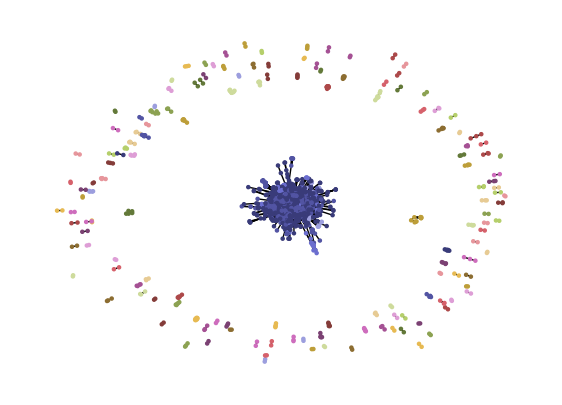

In [20]:
colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(louvain_partition.values())))))
colors_nodes = [colors_sns[louvain_partition[node]] for node in G.nodes()]

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_color=colors_nodes, with_labels=False, ax=ax, node_size=5)

plt.show()

In [15]:
nx.number_connected_components(G)

148

It seems as though the graph has many connected components of small size which are unlikely to be interesting from the perspective of comparing community detection techniques. I will therefore restrict my further analysis to the largest component.

In [21]:
F = G.copy()

largest_cc = max(nx.connected_components(F), key=len)

# Create a subgraph containing only the largest connected component
gcc = F.subgraph(largest_cc).copy()

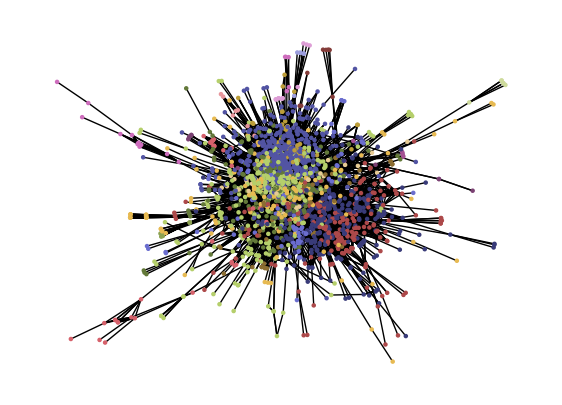

In [22]:
louvain_partition = community.best_partition(gcc)
colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(louvain_partition.values())))))
colors_nodes = [colors_sns[louvain_partition[node]] for node in gcc.nodes()]

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

pos = nx.spring_layout(gcc)
nx.draw(gcc, pos=pos, node_color=colors_nodes, with_labels=False, ax=ax, node_size=5)

plt.show()

In [24]:
community.modularity(louvain_partition, gcc)

0.5434154741100256

In [28]:
max(louvain_partition.values())

30

In [31]:
def nx2gt(nxG):
    """
    Converts a networkx graph to a graph-tool graph.
    """
    # Phase 0: Create a directed or undirected graph-tool Graph
    gtG = gt.Graph(directed=nxG.is_directed())

    # Add the Graph properties as "internal properties"
    for key, value in nxG.graph.items():
        # Convert the value and key into a type for graph-tool
        tname, value, key = get_prop_type(value, key)

        prop = gtG.new_graph_property(tname) # Create the PropertyMap
        gtG.graph_properties[key] = prop     # Set the PropertyMap
        gtG.graph_properties[key] = value    # Set the actual value

    # Phase 1: Add the vertex and edge property maps
    # Go through all nodes and edges and add seen properties
    # Add the node properties first
    nprops = set() # cache keys to only add properties once
    for node, data in nxG.nodes(data=True):

        # Go through all the properties if not seen and add them.
        for key, val in data.items():
            if key in nprops: continue # Skip properties already added

            # Convert the value and key into a type for graph-tool
            tname, _, key  = get_prop_type(val, key)

            prop = gtG.new_vertex_property(tname) # Create the PropertyMap
            gtG.vertex_properties[key] = prop     # Set the PropertyMap

            # Add the key to the already seen properties
            nprops.add(key)

    # Also add the node id: in NetworkX a node can be any hashable type, but
    # in graph-tool node are defined as indices. So we capture any strings
    # in a special PropertyMap called 'id' -- modify as needed!
    gtG.vertex_properties['id'] = gtG.new_vertex_property('string')

    # Add the edge properties second
    eprops = set() # cache keys to only add properties once
    for src, dst, data in nxG.edges(data=True):

        # Go through all the edge properties if not seen and add them.
        for key, val in data.items():
            if key in eprops: continue # Skip properties already added

            # Convert the value and key into a type for graph-tool
            tname, _, key = get_prop_type(val, key)

            prop = gtG.new_edge_property(tname) # Create the PropertyMap
            gtG.edge_properties[key] = prop     # Set the PropertyMap

            # Add the key to the already seen properties
            eprops.add(key)

    # Phase 2: Actually add all the nodes and vertices with their properties
    # Add the nodes
    vertices = {} # vertex mapping for tracking edges later
    for node, data in nxG.nodes(data=True):

        # Create the vertex and annotate for our edges later
        v = gtG.add_vertex()
        vertices[node] = v

        # Set the vertex properties, not forgetting the id property
        data['id'] = str(node)
        for key, value in data.items():
            gtG.vp[key][v] = value # vp is short for vertex_properties

    # Add the edges
    for src, dst, data in nxG.edges(data=True):

        # Look up the vertex structs from our vertices mapping and add edge.
        e = gtG.add_edge(vertices[src], vertices[dst])

        # Add the edge properties
        for key, value in data.items():
            gtG.ep[key][e] = value # ep is short for edge_properties

    # Done, finally!
    return gtG

In [32]:
gcc_gt = nx2gt(gcc)

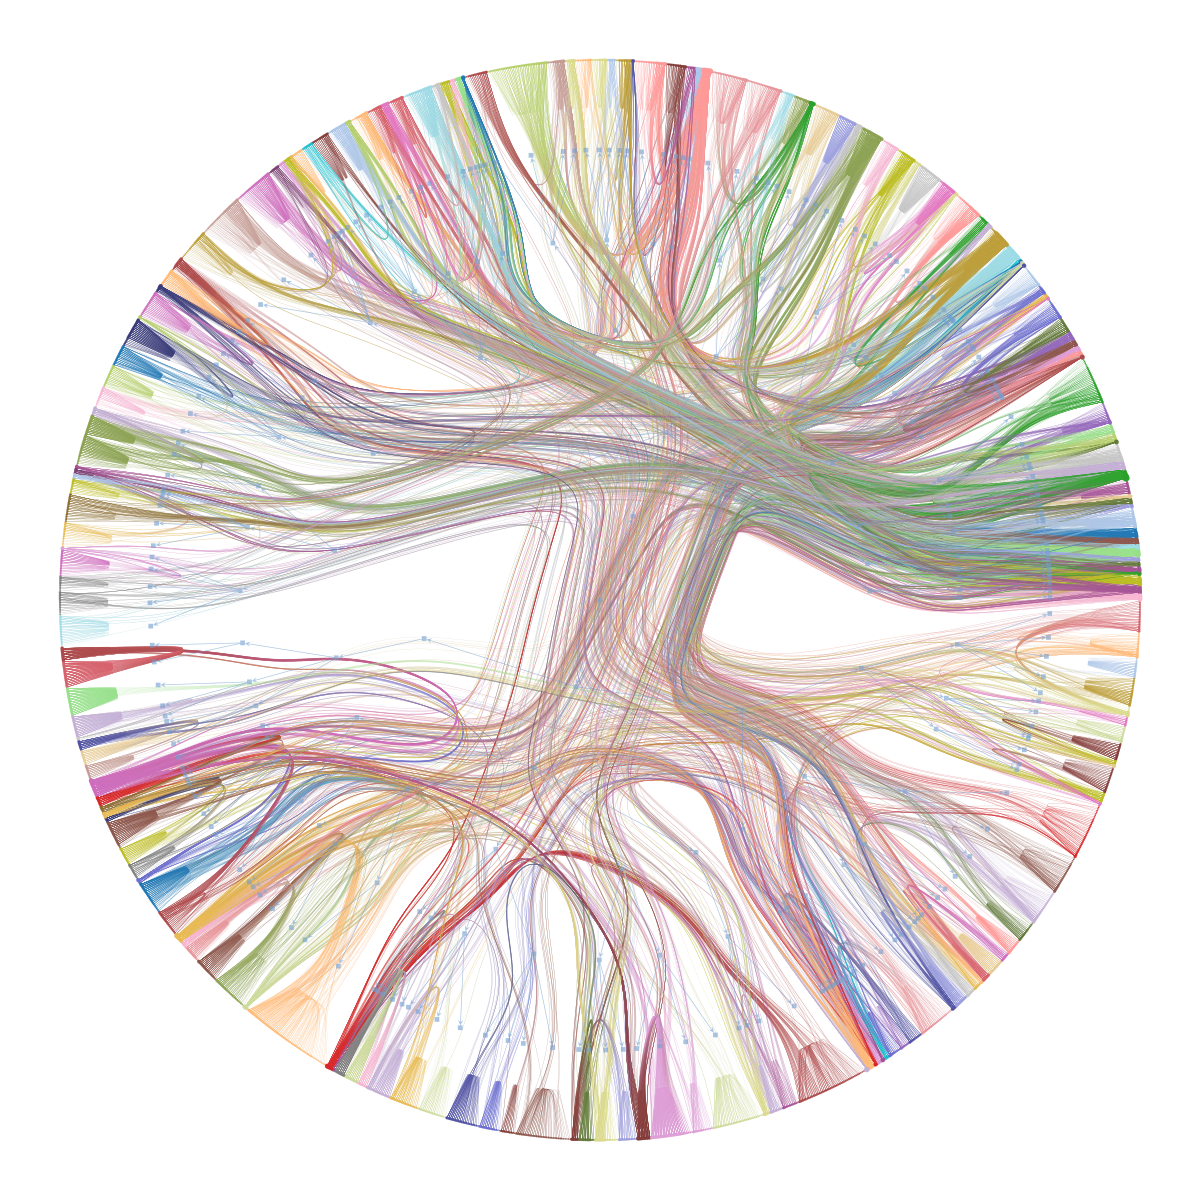

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b73295b3dd0, at 0x2b739e774b90>,
 <GraphView object, directed, with 2294 vertices and 2293 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2b739e964ed0, at 0x2b739e964950>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2b739e964ed0, at 0x2b739e966290>, False), at 0x2b739e964ed0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b739e964ed0, at 0x2b739e966990>)

In [73]:
state_dc_nest = gt.minimize_nested_blockmodel_dl(gcc_gt, state_args=dict(deg_corr=True), multilevel_mcmc_args={'niter':20})
state_dc_nest.draw(layout = 'radial')

In [86]:
blocks = state_dc_nest.get_bs()

In [99]:
len(list(blocks[9]))

1

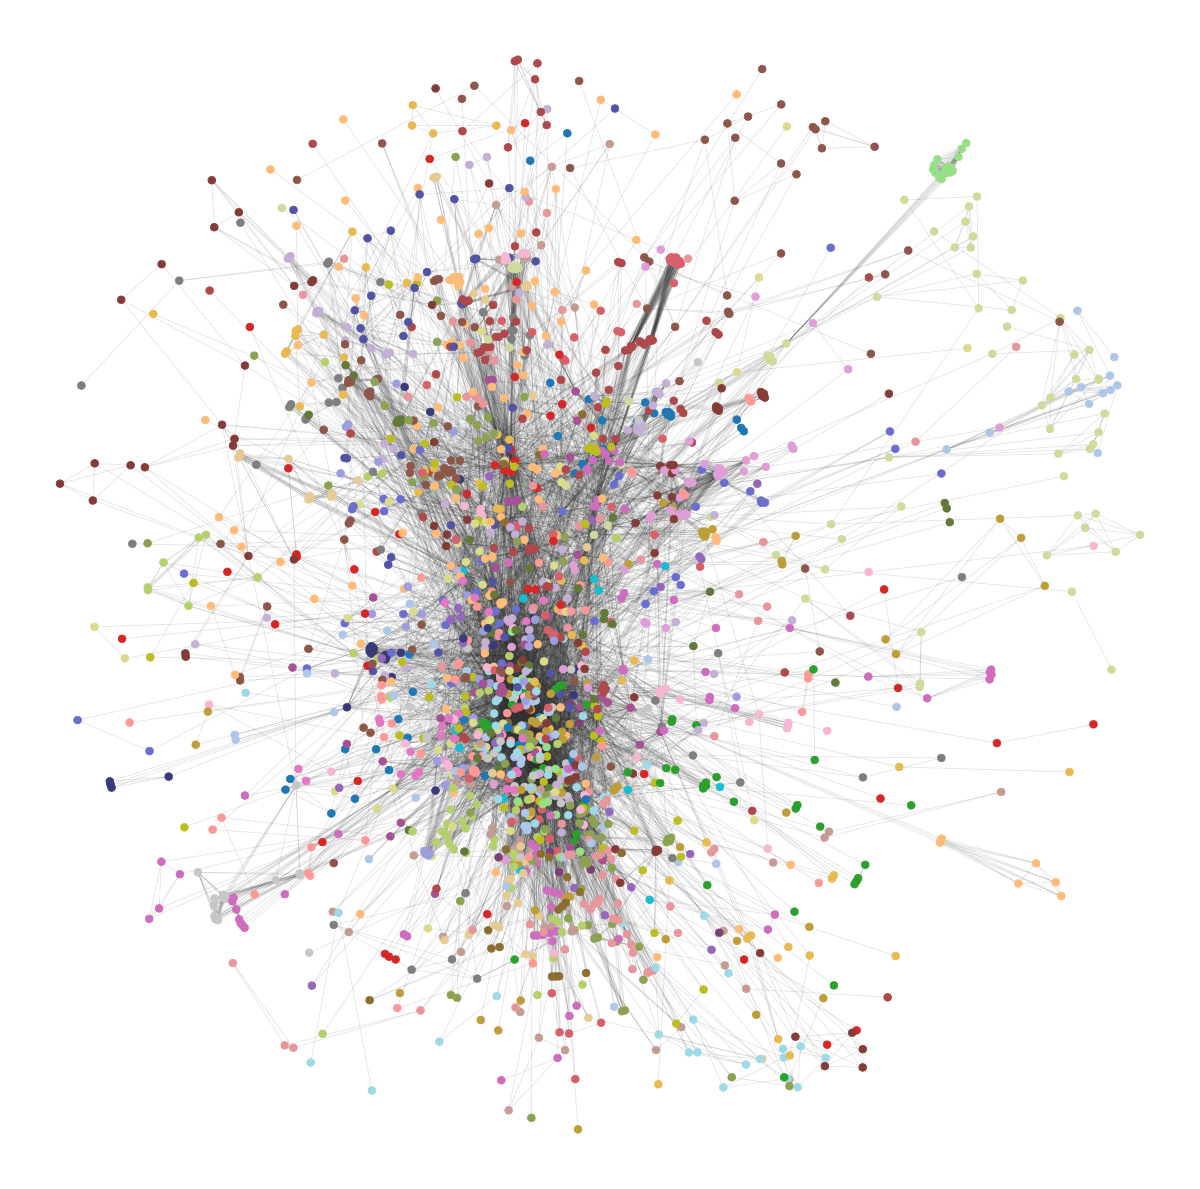

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b73295b3dd0, at 0x2b7357710d10>

In [78]:
pos2 = gt.sfdp_layout(gcc_gt, groups=state_dc_nest.levels[0].b, gamma=.04) 
# def rotate(pos, a):
#     """Rotate the positions by `a` degrees."""
#     theta = np.radians(a)
#     c, s = np.cos(theta), np.sin(theta)
#     R = np.array(((c, -s), (s, c)))
#     x, y = pos.get_2d_array()
#     cm = np.array([x.mean(), y.mean()])
#     return pos.t(lambda x: R @ (x.a - cm) + cm)
# pos2 = rotate(pos2, 110) 
state_dc_nest.levels[0].draw(pos=pos2, edge_gradient=[], edge_color="#33333322")

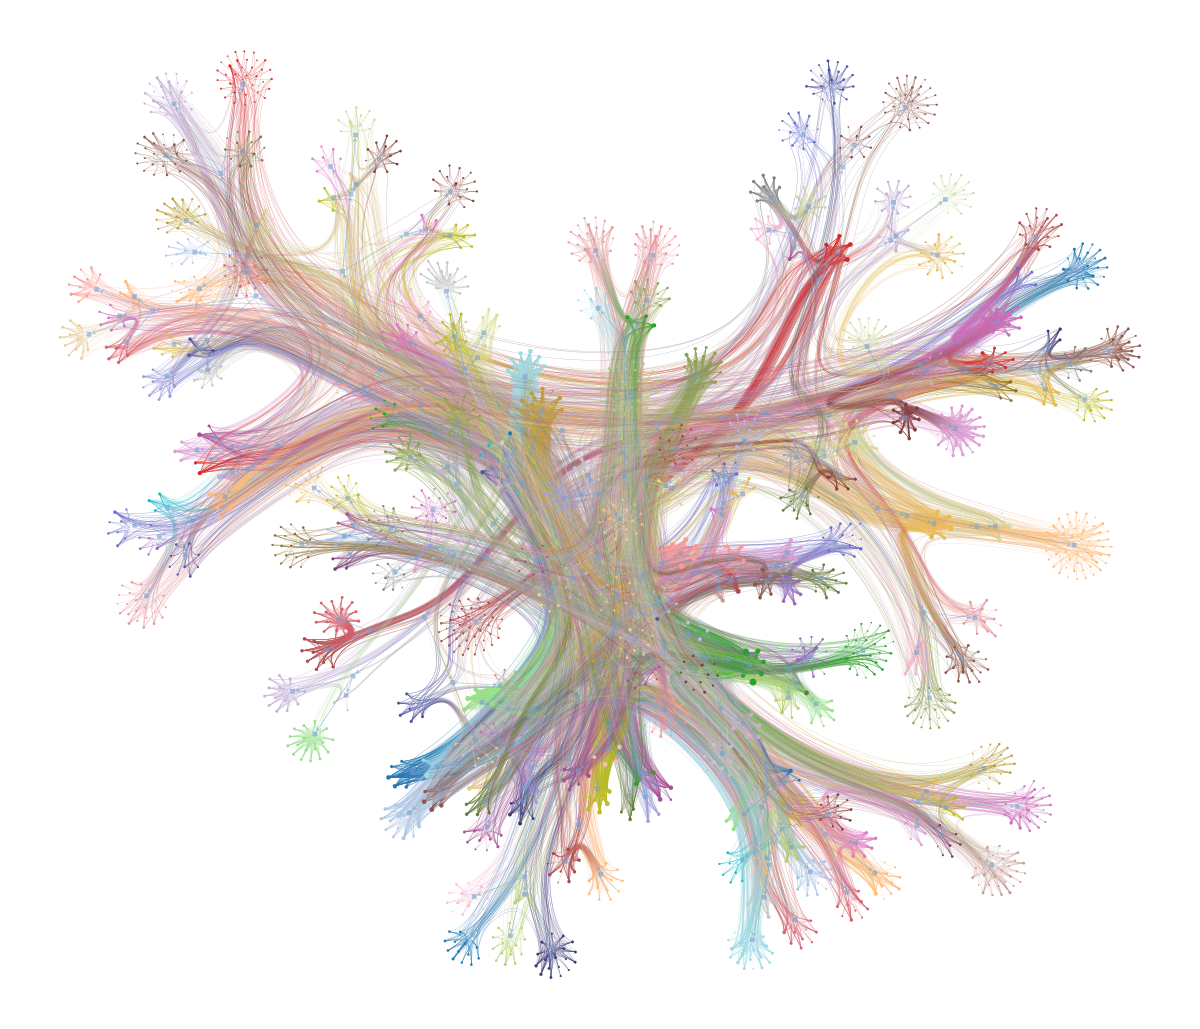

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b73295b3dd0, at 0x2b735768f390>,
 <GraphView object, directed, with 2294 vertices and 2293 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2b735791b6d0, at 0x2b735787e6d0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2b735791b6d0, at 0x2b739e587c10>, False), at 0x2b735791b6d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b735791b6d0, at 0x2b739ddd5050>)

In [72]:
state_dc_nest.draw(layout = 'sfdp')

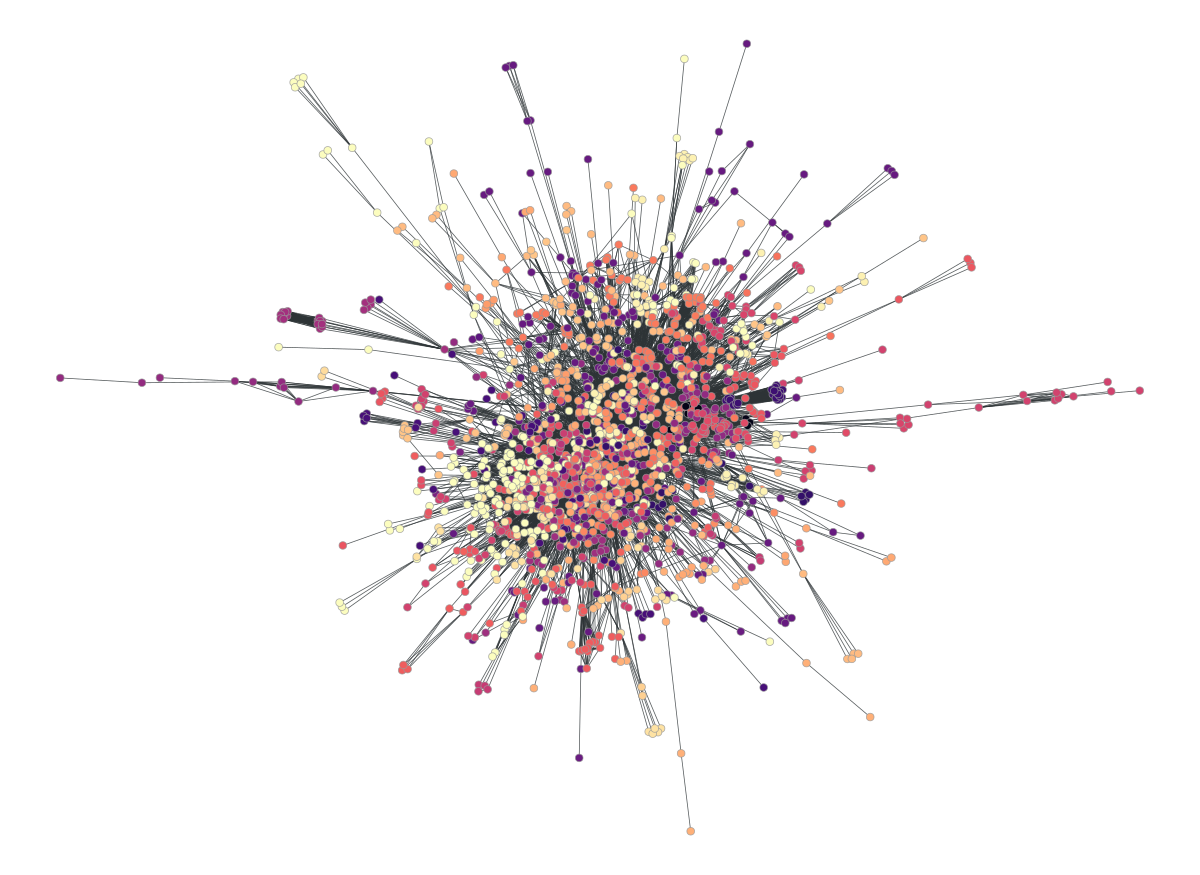

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b73295b3dd0, at 0x2b732660d310>

In [65]:
blocks = state_dc_nest.get_blocks()
pos = gt.fruchterman_reingold_layout(gcc_gt)
block_colors = gt.prop_to_size(blocks, mi=0, ma=1)  # Normalize blocks between 0 and 1
gt.graph_draw(gcc_gt, pos=pos, vertex_fill_color=block_colors)


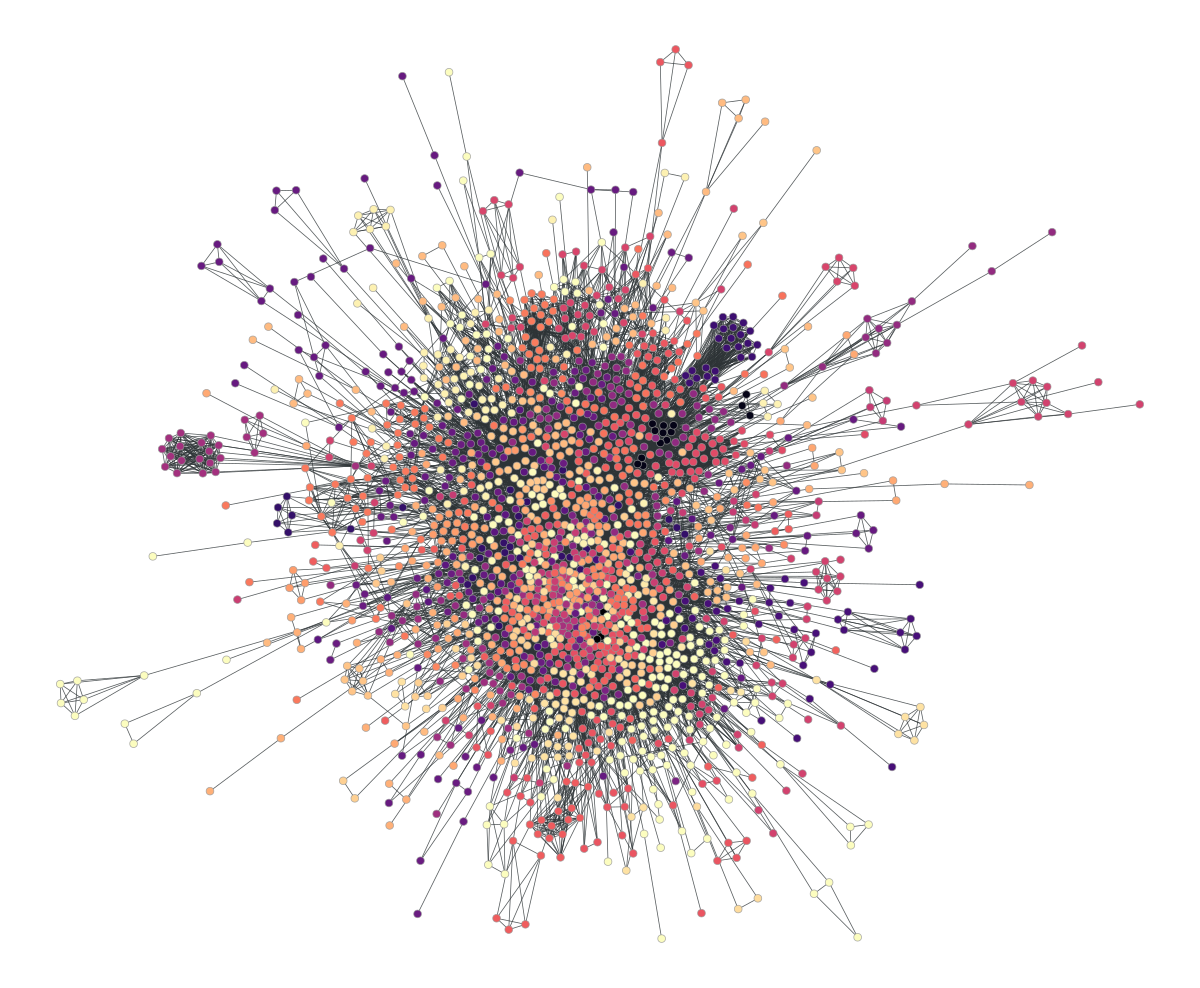

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b73295b3dd0, at 0x2b73273a9710>

In [69]:
blocks = state_dc_nest.get_blocks()
pos = gt.sfdp_layout(gcc_gt)
block_colors = gt.prop_to_size(blocks, mi=0, ma=1)  # Normalize blocks between 0 and 1
gt.graph_draw(gcc_gt, pos=pos, vertex_fill_color=block_colors)

In [70]:
blocks = state_dc_nest.get_blocks()
pos = gt.arf_layout(gcc_gt)
block_colors = gt.prop_to_size(blocks, mi=0, ma=1)  # Normalize blocks between 0 and 1
gt.graph_draw(gcc_gt, pos=pos, vertex_fill_color=block_colors)

ValueError: cannot convert float NaN to integer

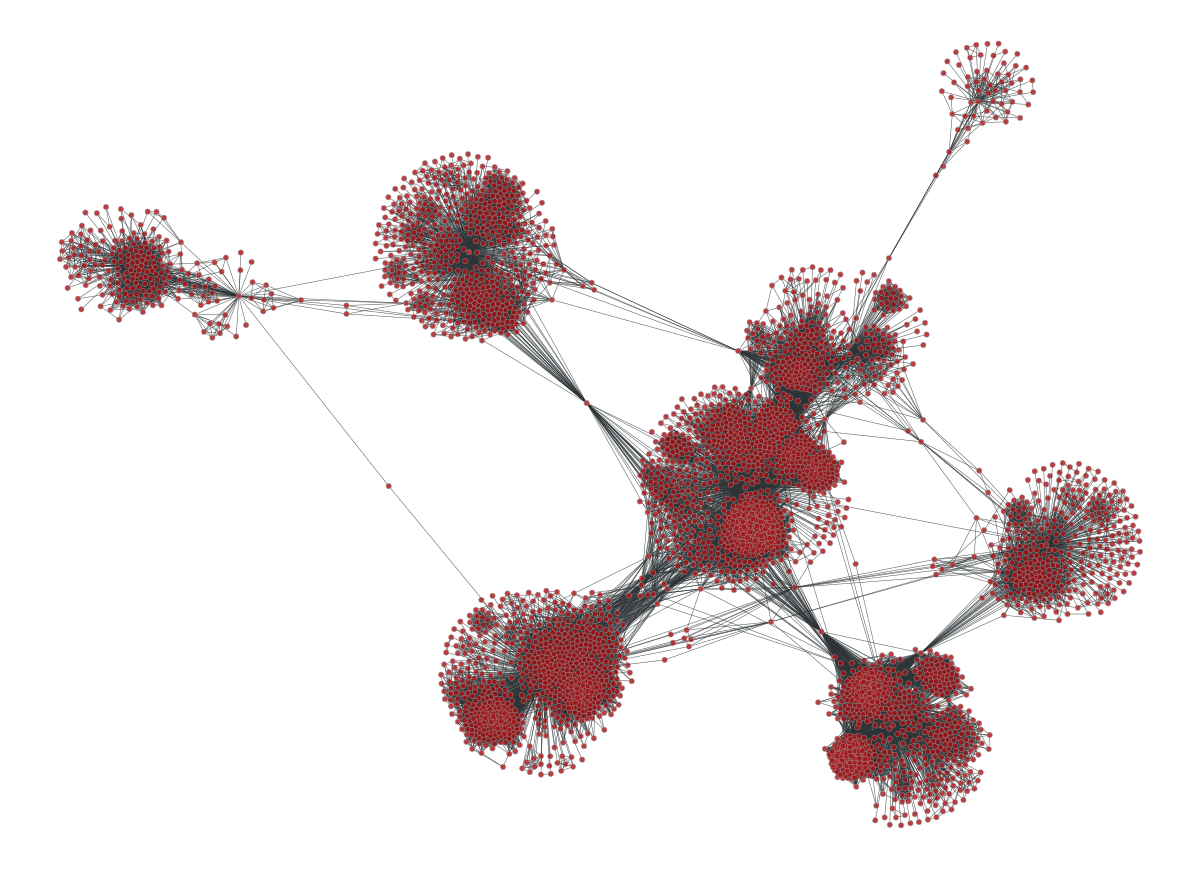

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2b739e59b550, at 0x2b739e8f82d0>

In [48]:
g = gt.collection.ns["ego_social/facebook_combined"]

state = gt.minimize_blockmodel_dl(g)
gt.graph_draw(g, g.vp._pos)


In [52]:
list(g.vp._pos)

[array([14.7514209 ,  9.63724208]),
 array([14.71562776,  9.61787926]),
 array([14.84031835,  9.59397849]),
 array([14.76646917,  9.71421462]),
 array([14.84261097,  9.72496365]),
 array([14.67515436,  9.64229075]),
 array([14.89237023,  9.64455666]),
 array([14.68716087,  9.73640011]),
 array([14.88170748,  9.60892151]),
 array([14.72192757,  9.68244899]),
 array([14.71074405,  9.7256685 ]),
 array([14.81707725,  9.52352112]),
 array([14.74730801,  9.51187591]),
 array([14.73760151,  9.71344645]),
 array([14.8284467 ,  9.56052651]),
 array([14.75766175,  9.5237123 ]),
 array([14.79103256,  9.6662129 ]),
 array([14.8629775 ,  9.59024312]),
 array([14.72122293,  9.53035489]),
 array([14.85040803,  9.61152607]),
 array([14.83549968,  9.56778109]),
 array([14.72054069,  9.67582257]),
 array([14.70472244,  9.73654064]),
 array([14.82254719,  9.62835943]),
 array([14.71169948,  9.55910967]),
 array([14.74588664,  9.67621195]),
 array([14.73305497,  9.68369402]),
 array([14.66072215,  9.6378